In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

## laoding the health insurance data

In [2]:
df=pd.read_csv('1651277648862_healthinsurance.csv')

In [3]:
df.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


## Data cleaning 

In [4]:
df.columns 

Index(['age', 'sex', 'weight', 'bmi', 'hereditary_diseases',
       'no_of_dependents', 'smoker', 'city', 'bloodpressure', 'diabetes',
       'regular_ex', 'job_title', 'claim'],
      dtype='object')

In [5]:
df.shape 

(15000, 13)

In [6]:
df.isnull().sum() 

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

In [7]:
df.describe()

,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
count,14604.000000,15000.000000,14044.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,39.547521,64.909600,30.266413,1.129733,0.198133,68.650133,0.777000,0.224133,13401.437620
std,14.015966,13.701935,6.122950,1.228469,0.398606,19.418515,0.416272,0.417024,12148.239619
min,18.000000,34.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.900000
25%,27.000000,54.000000,25.700000,0.000000,0.000000,64.000000,1.000000,0.000000,4846.900000
50%,40.000000,63.000000,29.400000,1.000000,0.000000,71.000000,1.000000,0.000000,9545.650000
75%,52.000000,76.000000,34.400000,2.000000,0.000000,80.000000,1.000000,0.000000,16519.125000
max,64.000000,95.000000,53.100000,5.000000,1.000000,122.000000,1.000000,1.000000,63770.400000


In [14]:
# Select only numeric columns
numeric_data = df.select_dtypes(include=['number'])
skewness = numeric_data.skew()
kurtosis = numeric_data.kurt()

print("Skewness:")
print(skewness)
print("\nKurtosis:")
print(kurtosis)

Skewness:
age                 0.005577
weight              0.286034
bmi                 0.375259
no_of_dependents    0.928935
smoker              1.514812
bloodpressure      -1.963879
diabetes           -1.331037
regular_ex          1.323201
claim               1.497829
dtype: float64

Kurtosis:
age                -1.250189
weight             -0.866120
bmi                -0.094215
no_of_dependents    0.192328
smoker              0.294695
bloodpressure       5.432755
diabetes           -0.228370
regular_ex         -0.249172
claim               1.470063
dtype: float64


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [9]:
from sklearn.impute import SimpleImputer

# Initialize the SimpleImputer with the strategy 'mean'
imputer = SimpleImputer(strategy='mean')

# Specify the columns with missing values that we want to impute
columns_with_missing_values = ['age', 'bmi']

# Apply the imputer to fill missing values with the mean
df[columns_with_missing_values] = imputer.fit_transform(df[columns_with_missing_values])

df.isnull().sum()

age                    0
sex                    0
weight                 0
bmi                    0
hereditary_diseases    0
no_of_dependents       0
smoker                 0
city                   0
bloodpressure          0
diabetes               0
regular_ex             0
job_title              0
claim                  0
dtype: int64

# EDA
EDA stands for Exploratory Data Analysis. It is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. EDA involves techniques such as data visualization, summary statistics, and various graphical representations to gain insight into the data. The primary goal of EDA is to understand the structure of the data, identify patterns, spot anomalies, and formulate hypotheses that can guide further investigation or modeling.

# Relation graph

## Scatter plot 









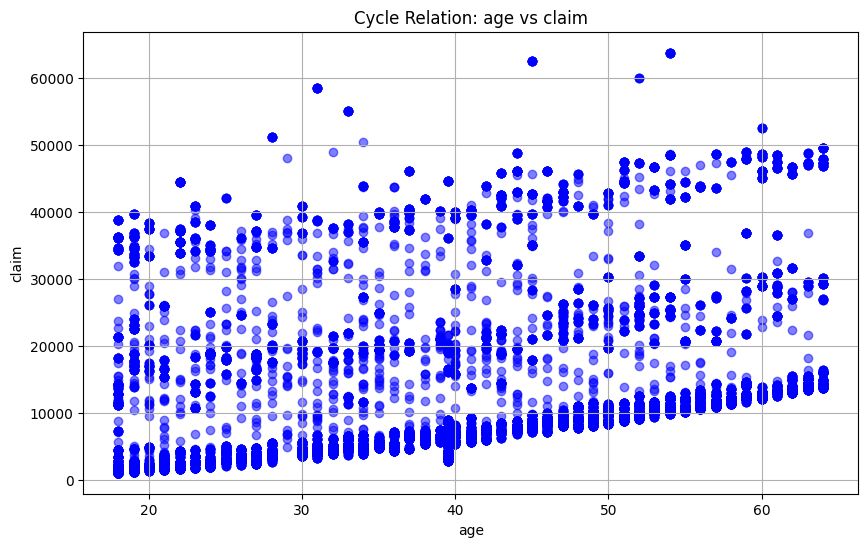

In [10]:
import matplotlib.pyplot as plt

def plot_cycle_relation(data, x_column, y_column):
    """
    Plot a relational graph (scatter plot) to visualize a cycle relation.

    Args:
    - data (DataFrame): The DataFrame containing the dataset.
    - x_column (str): The name of the column representing the x-axis variable.
    - y_column (str): The name of the column representing the y-axis variable.

    Returns:
    - None
    """
    # Plot the scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(data[x_column], data[y_column], color='blue', alpha=0.5)
    
    # Set plot title and labels
    plt.title('Cycle Relation: {} vs {}'.format(x_column, y_column))
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    
    # Show the plot
    plt.grid(True)
    plt.show()

# Specify the columns representing the cycle relation
x_column = 'age'  # Update with the actual column name from your dataset
y_column = 'claim'  # Update with the actual column name from your dataset

# Plot the cycle relation using the DataFrame df
plot_cycle_relation(df, x_column, y_column)


This  code defines a function called 'plot_cycle_relation' that generates a scatter plot to visualize the relationship between two variables from a DataFrame. It imports the necessary 'matplotlib.pyplot' module for plotting. The function takes three arguments: the DataFrame containing the dataset ('data'), the name of the column representing the x-axis variable ('x_column'), and the name of the column representing the y-axis variable ('y_column'). Inside the function, a scatter plot is created using 'plt.scatter()', with the specified x and y columns from the DataFrame. The plot title, x-axis label, and y-axis label are set accordingly. Finally, the plot is displayed using 'plt.show()'. To use this function, you need to provide the actual DataFrame ('df') and specify the names of the x and y columns representing the cycle relation.


## Line graph 
.

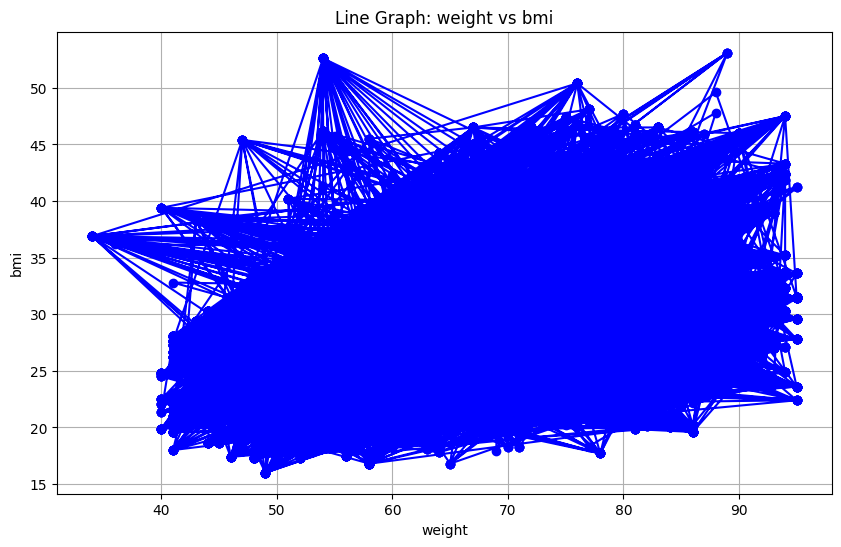

In [11]:
import matplotlib.pyplot as plt

def plot_line_graph(data, x_column, y_column):
    """
    Plot a line graph to visualize the relationship between two variables.

    Args:
    - data (DataFrame): The DataFrame containing the dataset.
    - x_column (str): The name of the column representing the x-axis variable.
    - y_column (str): The name of the column representing the y-axis variable.

    Returns:
    - None
    """
    # Plot the line graph
    plt.figure(figsize=(10, 6))
    plt.plot(data[x_column], data[y_column], color='blue', marker='o', linestyle='-')
    
    # Set plot title and labels
    plt.title('Line Graph: {} vs {}'.format(x_column, y_column))
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    
    # Show the plot
    plt.grid(True)
    plt.show()


# Specify the columns representing the line graph
x_column = 'weight'  # Update with the actual column name from your dataset
y_column = 'bmi'  # Update with the actual column name from your dataset

# Plot the line graph using the DataFrame df
plot_line_graph(df, x_column, y_column)


This code defines a function called plot_line_graph that generates a line graph to visualize the relationship between two variables from a DataFrame. It imports matplotlib.pyplot. The function takes data, x_column, and y_column as arguments. Inside the function, it creates a line graph using plt.plot(), with specified x and y columns. The plot's title, x-axis label, and y-axis label are set accordingly. Markers are circles ('o') and connected by lines ('-'). Finally, the plot is displayed using plt.show().

# Categorical graph 

## bar chart 


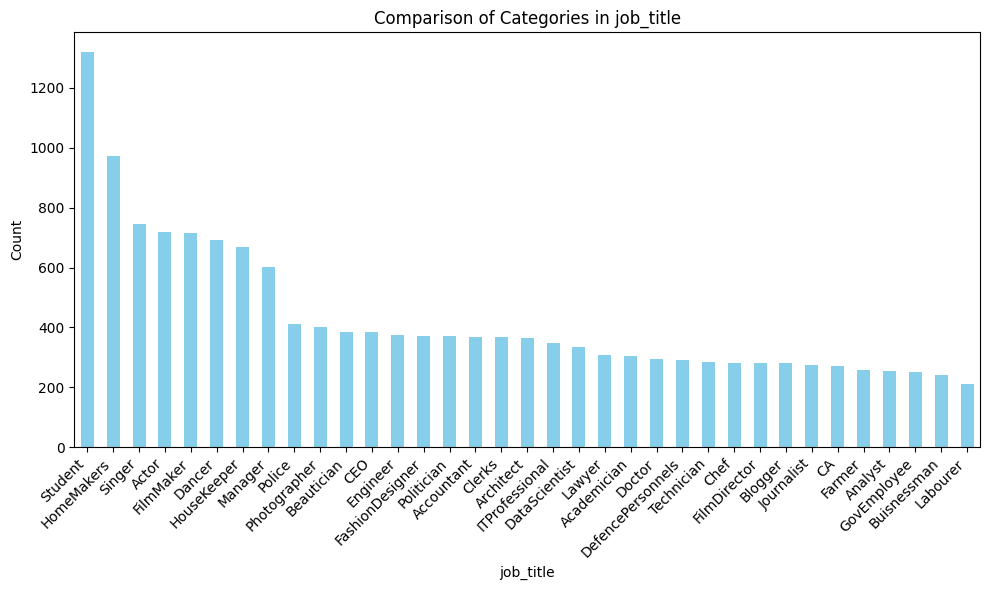

In [12]:

def plot_categorical_graph(data, category_column):
    """
    Plot a categorical graph (bar chart) to compare multiple categories.

    Args:
    - data (DataFrame): The DataFrame containing the dataset.
    - category_column (str): The name of the column representing the categorical variable.

    Returns:
    - None
    """
    # Count the occurrences of each category
    category_counts = data[category_column].value_counts()
    
    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    category_counts.plot(kind='bar', color='skyblue')
    
    # Set plot title and labels
    plt.title('Comparison of Categories in {}'.format(category_column))
    plt.xlabel(category_column)
    plt.ylabel('Count')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

# Specify the categorical column to compare
category_column = 'job_title'  # Update with the actual column name from your dataset

# Plot the categorical graph (bar chart) using the DataFrame df
plot_categorical_graph(df, category_column)


This code defines a function called plot_categorical_graph that generates a bar chart to compare multiple categories within a DataFrame. It imports matplotlib.pyplot. The function takes two arguments: the DataFrame containing the dataset (data) and the name of the column representing the categorical variable (category_column). Inside the function, it counts the occurrences of each category using value_counts() and then plots the bar chart using plt.plot(). The plot's title, x-axis label, and y-axis label are set accordingly. Additionally, the x-axis labels are rotated for better readability. Finally, the plot is displayed using plt.show(). To use this function, you need to provide the actual DataFrame (df) and specify the name of the categorical column you want to compare.

## Histogram 
.

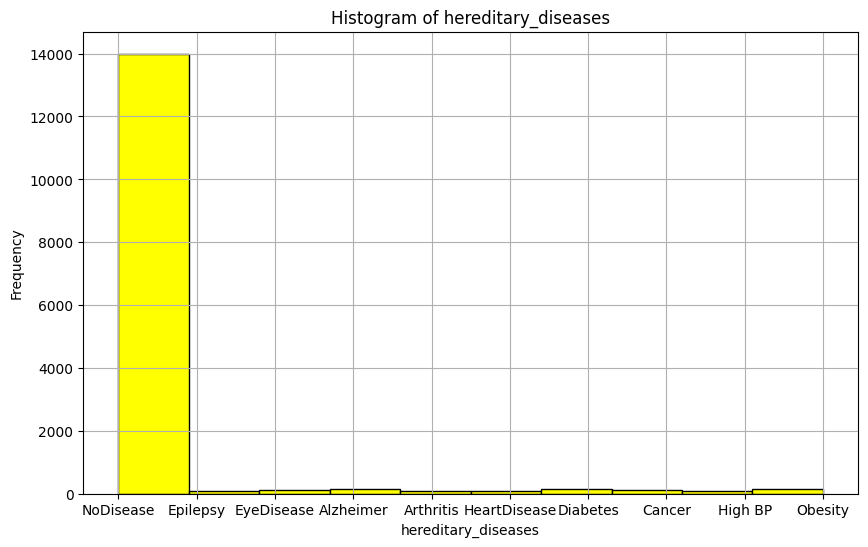

In [13]:

def plot_histogram(data, numerical_column, bins=10):
    """
    Plot a histogram to visualize the distribution of a numerical variable.

    Args:
    - data (DataFrame): The DataFrame containing the dataset.
    - numerical_column (str): The name of the column representing the numerical variable.
    - bins (int, optional): The number of bins to use in the histogram. Default is 10.

    Returns:
    - None
    """
    # Plot the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(data[numerical_column], bins=bins, color='yellow', edgecolor='black')
    
    # Set plot title and labels
    plt.title('Histogram of {}'.format(numerical_column))
    plt.xlabel(numerical_column)
    plt.ylabel('Frequency')
    
    # Show the plot
    plt.grid(True)
    plt.show()

# Specify the numerical column for the histogram
numerical_column = 'hereditary_diseases'  # Update with the actual column name from your dataset

# Plot the histogram using the DataFrame df
plot_histogram(df, numerical_column)



This  code defines a function called plot_histogram that generates a histogram to visualize the distribution of a numerical variable within a DataFrame. It imports matplotlib.pyplot. The function takes three arguments: the DataFrame containing the dataset (data), the name of the column representing the numerical variable (numerical_column), and an optional parameter bins specifying the number of bins for the histogram (default is 10). Inside the function, it plots the histogram using plt.hist() with the specified number of bins, color, and edge color. The plot's title, x-axis label, and y-axis label are set accordingly. Finally, the plot is displayed using plt.show(). To use this function, you need to provide the actual DataFrame (df) and specify the name of the numerical column you want to visualize the distribution of.

# statistical graph 

## Heat map
atmap 

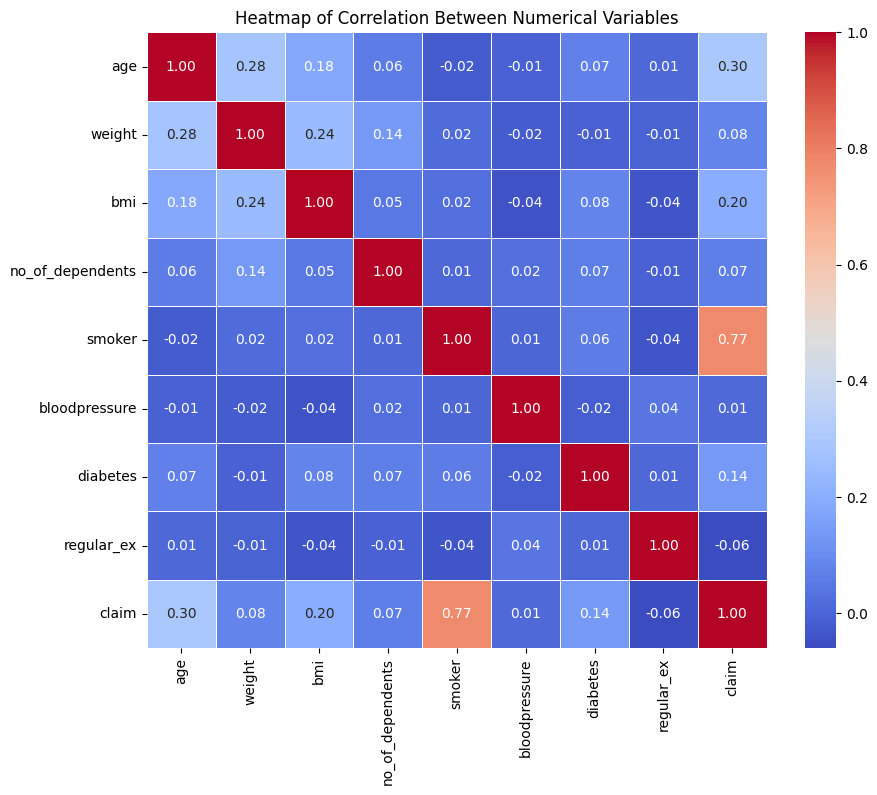

In [14]:
def plot_heatmap(data):
    """
    Plot a heatmap to visualize the correlation between numerical variables.

    Args:
    - data (DataFrame): The DataFrame containing the dataset.

    Returns:
    - None
    """
    # Filter out non-numeric columns
    numeric_data = data.select_dtypes(include=['int64', 'float64'])
    
    # Calculate the correlation matrix
    correlation_matrix = numeric_data.corr()
    
    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    
    # Set plot title
    plt.title('Heatmap of Correlation Between Numerical Variables')
    
    # Show the plot
    plt.show()

# Plot the heatmap using the DataFrame df
plot_heatmap(df)


This  code defines a function named plot_heatmap that generates a heatmap to visualize the correlation between numerical variables within a DataFrame. It utilizes matplotlib.pyplot and seaborn (sns) libraries. The function takes one argument, data, representing the DataFrame containing the dataset. Inside the function:

Non-numeric columns are filtered out to create a DataFrame containing only numerical data (numeric_data).
The correlation matrix is calculated using .corr() method on numeric_data.
The heatmap is plotted using sns.heatmap() with the correlation matrix, enabling annotations to display correlation coefficients (annot=True). The color map is set to 'coolwarm', and formatting of annotation is set to display two decimal places (fmt=".2f").
Plot title is set.
The plot is displayed using plt.show().atmap 

## violin
().

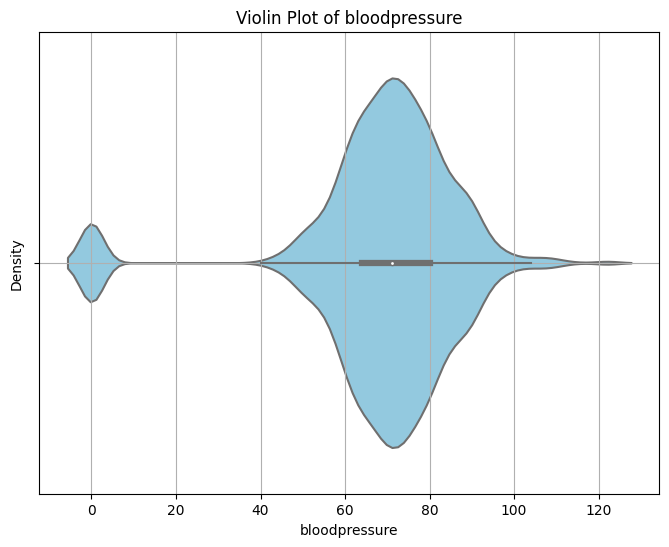

In [15]:
def plot_violin_plot(data, numerical_column):
    """
    Plot a violin plot to visualize the distribution of a numerical variable.

    Args:
    - data (DataFrame): The DataFrame containing the dataset.
    - numerical_column (str): The name of the column representing the numerical variable.

    Returns:
    - None
    """
    # Plot the violin plot
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=data[numerical_column], color='skyblue')
    
    # Set plot title and labels
    plt.title('Violin Plot of {}'.format(numerical_column))
    plt.xlabel(numerical_column)
    plt.ylabel('Density')
    
    # Show the plot
    plt.grid(True)
    plt.show()



# Specify the numerical column for the violin plot
numerical_column = 'bloodpressure'  # Update with the actual column name from your dataset

# Plot the violin plot using the DataFrame df
plot_violin_plot(df, numerical_column)


This code defines a function named plot_violin_plot that generates a violin plot to visualize the distribution of a numerical variable within a DataFrame. It utilizes matplotlib.pyplot and seaborn (sns) libraries. The function takes two arguments: the DataFrame containing the dataset (data) and the name of the column representing the numerical variable (numerical_column). Inside the function:
1. 
The violin plot is created using sns.violinplot() with the specified numerical column from the DataFram
   
2. .
Plot title, x-axis label (numerical_column), and y-axis label ('Density') are s

3.  t.
The plot is displayed using plt.show().

## corner plot 

ow().

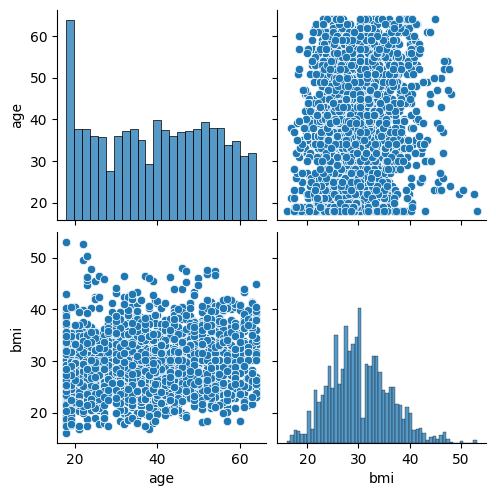

In [16]:
def plot_corner_plot(data, numerical_columns):
    """
    Plot a corner plot (pair plot) to visualize the relationships between pairs of numerical variables.

    Args:
    - data (DataFrame): The DataFrame containing the dataset.
    - numerical_columns (list): List of numerical column names.

    Returns:
    - None
    """
    # Filter out numerical columns from the dataset
    numeric_data = data[numerical_columns]
    
    # Create the corner plot
    sns.pairplot(numeric_data)
    
    # Show the plot
    plt.show()

# Specify the numerical columns for the corner plot
numerical_columns = ['age','bmi']  # Update with the actual column names from your dataset

# Plot the corner plot using the DataFrame df
plot_corner_plot(df, numerical_columns)


This  code defines a function named plot_corner_plot that generates a corner plot (pair plot) to visualize the relationships between pairs of numerical variables within a DataFrame. It utilizes seaborn (sns) and matplotlib.pyplot libraries. The function takes two arguments: the DataFrame containing the dataset (data) and a list of numerical column names (numerical_columns). Inside the function:

It filters out the specified numerical columns from the dataset.
A pair plot is created using sns.pairplot() with the numeric data.
The plot is displayed using plt.show().

## Data analysis 


t.show().

Descriptive Statistics:
                age        weight           bmi  no_of_dependents  \
count  15000.000000  15000.000000  15000.000000      15000.000000   
mean      39.547521     64.909600     30.266413          1.129733   
std       13.829705     13.701935      5.924606          1.228469   
min       18.000000     34.000000     16.000000          0.000000   
25%       27.000000     54.000000     25.900000          0.000000   
50%       40.000000     63.000000     29.800000          1.000000   
75%       51.000000     76.000000     34.100000          2.000000   
max       64.000000     95.000000     53.100000          5.000000   

             smoker  bloodpressure      diabetes    regular_ex         claim  
count  15000.000000   15000.000000  15000.000000  15000.000000  15000.000000  
mean       0.198133      68.650133      0.777000      0.224133  13401.437620  
std        0.398606      19.418515      0.416272      0.417024  12148.239619  
min        0.000000       0.000000    

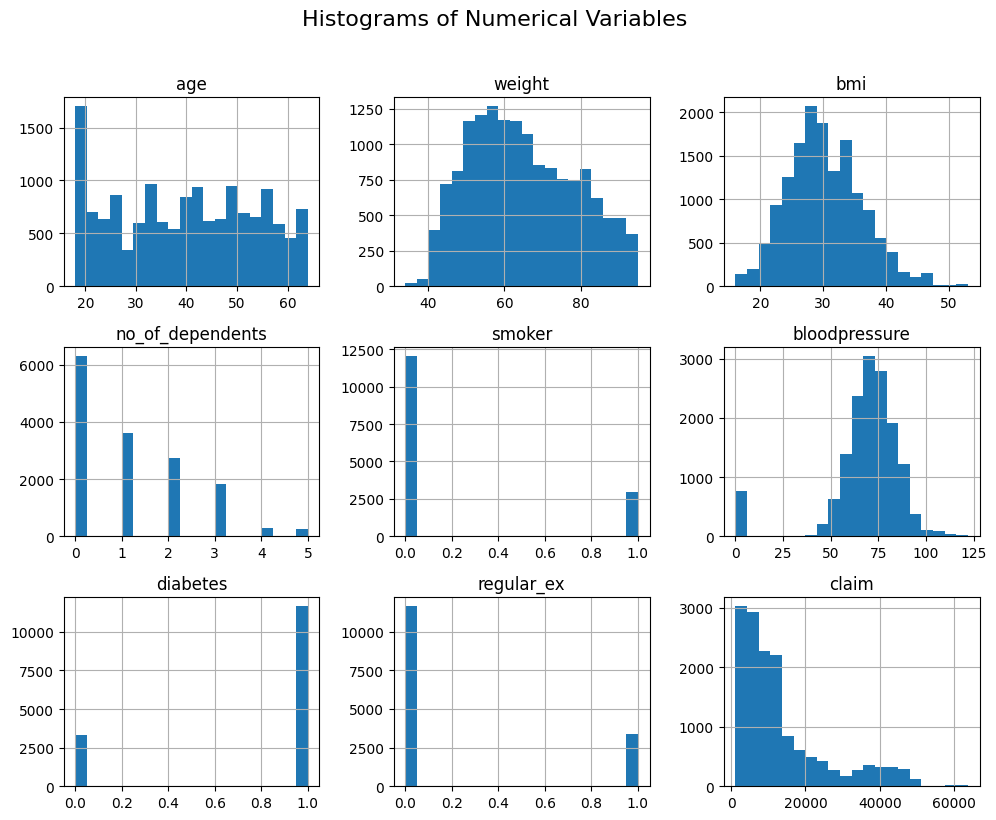

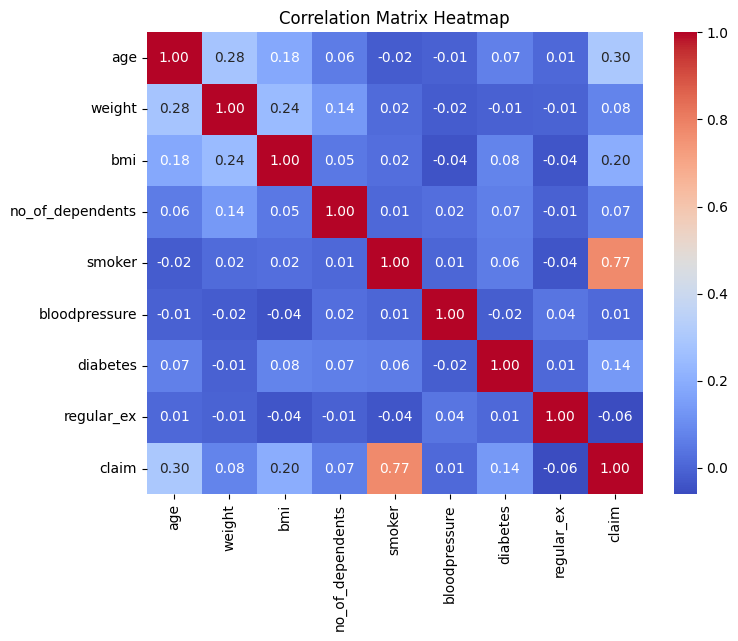

In [17]:
def data_analysis(df):
    """
    Perform data analysis on the Health Insurance Dataset.

    Parameters:
        df (DataFrame): The Health Insurance Dataset.

    Returns:
        None. Displays analysis results and visualizations.
    """

    # Filter out non-numeric columns
    numeric_df = df.select_dtypes(include=['number'])
    
    # Perform statistical analysis
    descriptive_stats = numeric_df.describe()  # Compute descriptive statistics
    correlation_matrix = numeric_df.corr()     # Compute correlation matrix
    
    # Display descriptive statistics
    print("Descriptive Statistics:")
    print(descriptive_stats)
    print("\n")
    
    
    # Visualize data distribution using histograms
    numeric_df.hist(figsize=(10, 8), bins=20)
    plt.suptitle('Histograms of Numerical Variables', x=0.5, y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # Visualize correlation matrix using heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix Heatmap')
    plt.show()


data_analysis(df)


This  function named data_analysis performs data analysis on the Health Insurance Dataset. It takes a DataFrame df as input. Inside the function:

It filters out non-numeric columns to create a DataFrame containing only numerical data (numeric_df).
Descriptive statistics are computed using .describe() on numeric_df, providing an overview of numerical variables' central tendency, dispersion, and distribution.
A correlation matrix is computed using .corr() on numeric_df, which shows the correlation coefficients between pairs of numerical variables.
Descriptive statistics are displayed using print() statements.
Data distribution is visualized using histograms for each numerical variable.
A heatmap is created using sns.heatmap() to visualize the correlation matrix.
Finally, the histograms and the correlation matrix heatmap are displayed using plt.show().

## statistical analysis 

ysis.








Major Moments:
                          mean   median           std      skew  kurtosis
age                  39.547521    40.00     13.829705  0.005652 -1.202724
weight               64.909600    63.00     13.701935  0.286034 -0.866120
bmi                  30.266413    29.80      5.924606  0.387818  0.103601
no_of_dependents      1.129733     1.00      1.228469  0.928935  0.192328
smoker                0.198133     0.00      0.398606  1.514812  0.294695
bloodpressure        68.650133    71.00     19.418515 -1.963879  5.432755
diabetes              0.777000     1.00      0.416272 -1.331037 -0.228370
regular_ex            0.224133     0.00      0.417024  1.323201 -0.249172
claim             13401.437620  9545.65  12148.239619  1.497829  1.470063


Correlation Matrix:
                       age    weight       bmi  no_of_dependents    smoker  \
age               1.000000  0.281228  0.180123          0.058926 -0.019417   
weight            0.281228  1.000000  0.243269          0.135687  0

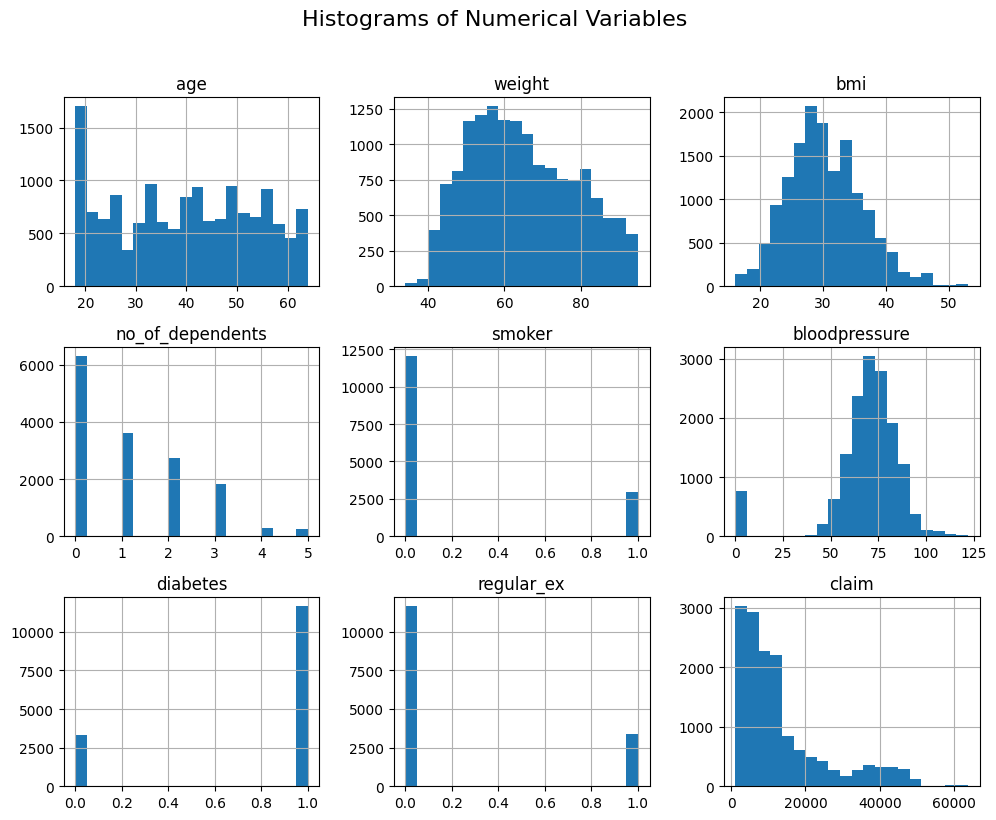

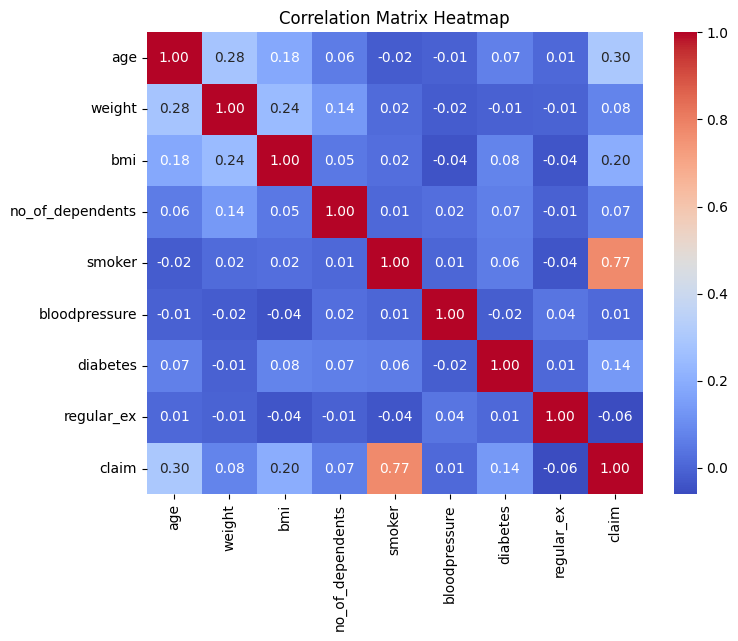

In [18]:
def preprocess_data(df):
    # Convert non-numeric columns to numeric or remove them
    numeric_columns = df.select_dtypes(include=['number']).columns
    df = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
    df = df.dropna()  # Drop rows with NaN values after conversion
    return df

def statistical_depth_analysis(df):
    """
    Perform statistical depth analysis on the Health Insurance Dataset.

    Parameters:
        df (DataFrame): Health Insurance Dataset DataFrame.

    Returns:
        None. Displays statistical depth analysis results and visualizations.
    """
    # Preprocess data
    df = preprocess_data(df)
    
    # Compute major moments
    major_moments = df.agg(['mean', 'median', 'std', 'skew', 'kurtosis']).transpose()
    print("Major Moments:")
    print(major_moments)
    print("\n")
    
    # Compute correlation matrix
    correlation_matrix = df.corr()
    
    # Display correlation matrix
    print("Correlation Matrix:")
    print(correlation_matrix)
    print("\n")
    
    # Display basic statistics using describe
    print("Basic Statistics:")
    print(df.describe())
    print("\n")
    
    # Visualize data distribution using histograms
    df.hist(figsize=(10, 8), bins=20)
    plt.suptitle('Histograms of Numerical Variables', x=0.5, y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # Visualize correlation matrix using heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix Heatmap')
    plt.show()

# L

# Perform statistical depth analysis on the Health Insurance Dataset
statistical_depth_analysis(df)


This code contains two functions: preprocess_data and statistical_depth_analysis.

preprocess_data(df): This function preprocesses the data by converting non-numeric columns to numeric or removing them. It first identifies numeric columns using select_dtypes(include=['number']).columns. Then, it applies pd.to_numeric to convert non-numeric values to numeric, handling errors with errors='coerce'. After conversion, rows with NaN values are dropped using df.dropna(). The preprocessed DataFrame is returned.

statistical_depth_analysis(df): This function performs statistical depth analysis on the Health Insurance Dataset. First, it preprocesses the data using preprocess_data(df). Then, it computes major moments (mean, median, standard deviation, skewness, and kurtosis) using .agg(['mean', 'median', 'std', 'skew', 'kurtosis']).transpose() and displays them. It computes the correlation matrix using df.corr() and displays it. Basic statistics are displayed using df.describe(). Data distribution is visualized using histograms. Finally, the correlation matrix heatmap is plotted using sns.heatmap().

To utilize these functions, provide the Health Insurance Dataset DataFrame (df) as input to statistical_depth_analysis.


In [19]:
import warnings
warnings.filterwarnings('ignore')

## Clustering function 

luster labels.

In [20]:
from sklearn.cluster import KMeans

def cluster_data(df, num_clusters):
    """
    Perform K-means clustering on the Health Insurance Dataset.

    Parameters:
        df (DataFrame): Health Insurance Dataset DataFrame.
        num_clusters (int): Number of clusters to create.

    Returns:
        Series: Cluster labels for each data point.
    """
    # Preprocess data
    df = preprocess_data(df)
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df)
    
    return cluster_labels

# Define the number of clusters
num_clusters = 5

# Perform clustering
cluster_labels = cluster_data(df, num_clusters)
print("Cluster Labels:")
print(cluster_labels)


Cluster Labels:
[1 1 3 ... 4 1 0]


This code utilizes the scikit-learn library to perform K-means clustering on the Health Insurance Dataset. Here's what each part of the code does:

Import the necessary module for K-means clustering: from sklearn.cluster import KMeans.

Define a function named cluster_data that performs K-means clustering. It takes two parameters: the Health Insurance Dataset DataFrame (df) and the number of clusters to create (num_clusters).

Preprocess the data using the preprocess_data function to convert non-numeric columns to numeric or remove them.

Perform K-means clustering using the KMeans class from scikit-learn with the specified number of clusters (num_clusters). The fit_predict method fits the model to the data and returns the cluster labels for each data point.

Return the cluster labels.

Define the number of clusters (num_clusters) and call the cluster_data function to perform clustering on the dataset.

Print the cluster labels.

## fitting function 
 squared error.
n:

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def polynomial_fit(df, degree=2):
    """
    Perform polynomial fitting using polynomial regression on the Health Insurance Dataset.

    Parameters:
        df (DataFrame): Health Insurance Dataset DataFrame.
        degree (int): Degree of the polynomial regression (default is 2).

    Returns:
        float: Mean squared error of the fitted model.
    """
    # Choose features and target
    X = df[['age', 'bmi']]
    y = df['claim']
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    
    # Fit polynomial regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict on test set
    X_test_poly = poly_features.transform(X_test)
    y_pred = model.predict(X_test_poly)
    
    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)
    
    return mse

# Perform polynomial fitting
mse = polynomial_fit(df)
print("Mean Squared Error:", mse)


Mean Squared Error: 131350644.11868776


This code utilizes scikit-learn to perform polynomial fitting using polynomial regression on the Health Insurance Dataset. Here's a breakdown of each part of the code:

Import necessary modules for polynomial regression and evaluatio

Define a function named polynomial_fit that performs polynomial fitting using polynomial regression. It takes two parameters: the Health Insurance Dataset DataFrame (df) and the degree of the polynomial regression (degree, default is 2).

Choose features (age, bmi) and target (claim) from the dataset.

Split the data into training and testing sets using train_test_split.

Create polynomial features up to the specified degree using PolynomialFeatures.

Fit the polynomial regression model using LinearRegression.

Predict the target variable on the test set.

Calculate the mean squared error between the actual and predicted values using mean_squared_error.

Return the mean squared error.

Perform polynomial fitting using the polynomial_fit function and print the mean squared error.
n:

## clustering quality
 to level off.

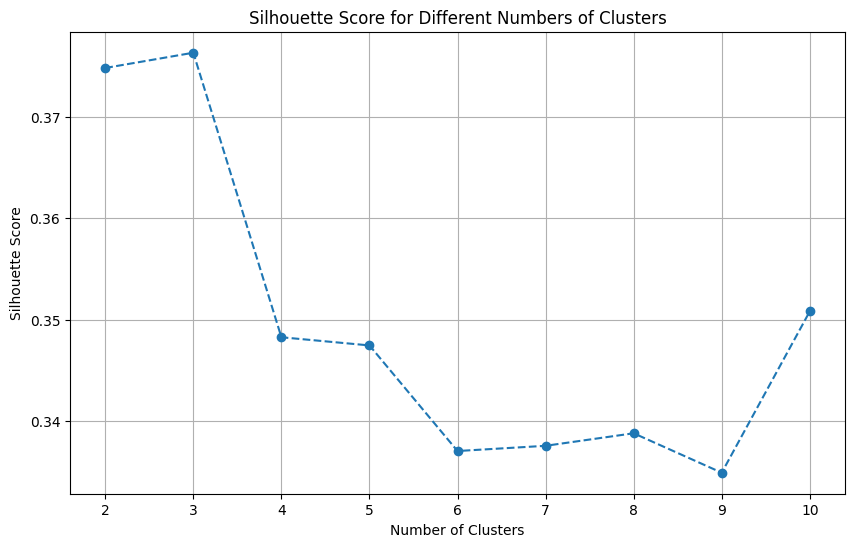

In [22]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


def clustering_quality(df):
    """
    Evaluate the quality of clustering using silhouette score and elbow method.

    Parameters:
        df (DataFrame): Health Insurance Dataset DataFrame.

    Returns:
        None. Displays silhouette score plot and elbow plot.
    """
    # Select numerical features for clustering
    features = df[['age', 'bmi']]
    
    # Normalize the data
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    
    # Take a subset of the data for clustering
    subset_size = 5000
    subset_indices = np.random.choice(features_scaled.shape[0], subset_size, replace=False)
    features_subset = features_scaled[subset_indices]
    
    # Evaluate silhouette scores for different numbers of clusters
    silhouette_scores = []
    for n_clusters in range(2, 11):
        kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(features_subset)
        silhouette_avg = silhouette_score(features_subset, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    
    # Plot silhouette scores
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score for Different Numbers of Clusters')
    plt.xticks(range(2, 11))
    plt.grid(True)
    plt.show()



# Evaluate clustering quality
clustering_quality(df)



This function named clustering_quality evaluates the quality of clustering using silhouette score and the elbow method. Here's what each part of the code does:

Selects numerical features (age and bmi) from the Health Insurance Dataset DataFrame (df).

Normalizes the data using StandardScaler().

Takes a subset of the normalized data (5000 samples) for clustering.

Evaluates silhouette scores for different numbers of clusters (ranging from 2 to 10) using MiniBatchKMeans clustering.

Plots the silhouette scores against the number of clusters to visualize how silhouette score varies with the number of clusters.

Displays the silhouette score plot.

This function helps in determining the optimal number of clusters for K-means clustering by examining the silhouette scores. The silhouette score measures how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates better clustering. The elbow method can also be used in conjunction with the silhouette score plot to identify the optimal number of clusters by looking for the "elbow" point where the silhouette score starts to level off.

## fitting quality (linear regression fitting)

squared error.

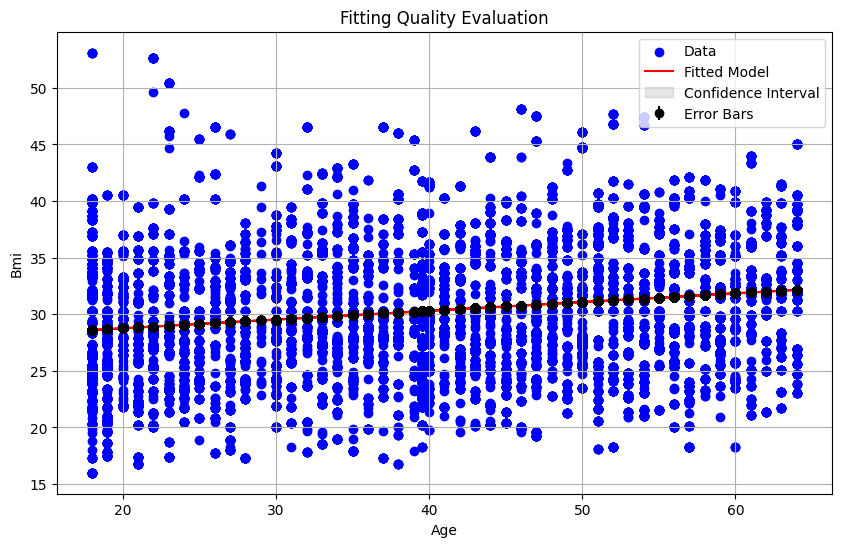

Mean Squared Error: 33.95987491280713


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import linregress

def fitting_quality(df, feature_col, target_col):
    """
    Evaluate the quality of fitting by visualizing data and fitted model with error bars.

    Parameters:
        df (DataFrame): Health Insurance Dataset DataFrame.
        feature_col (str): Name of the feature column.
        target_col (str): Name of the target column.

    Returns:
        None. Displays the plot of data and fitted model with error bars.
    """
    # Extract features and target variable
    features = df[[feature_col]]
    target = df[target_col]
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(features, target)
    
    # Predict target variable
    predicted = model.predict(features)
    
    # Calculate confidence interval and error bars
    slope, intercept, r_value, p_value, std_err = linregress(features.values.flatten(), target.values.flatten())
    confidence_interval = 1.96 * std_err  # 95% confidence interval
    lower_bound = predicted - confidence_interval
    upper_bound = predicted + confidence_interval
    
    # Plot data, fitted model, and error bars
    plt.figure(figsize=(10, 6))
    plt.scatter(features, target, color='blue', label='Data')
    plt.plot(features, predicted, color='red', label='Fitted Model')
    plt.fill_between(features.values.flatten(), lower_bound, upper_bound, color='gray', alpha=0.2, label='Confidence Interval')
    plt.errorbar(features, predicted, yerr=confidence_interval, fmt='o', color='black', label='Error Bars')
    plt.xlabel(feature_col.capitalize())
    plt.ylabel(target_col.capitalize())
    plt.title('Fitting Quality Evaluation')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Calculate and print mean squared error
    mse = mean_squared_error(target, predicted)
    print(f"Mean Squared Error: {mse}")


# Evaluate fitting quality
fitting_quality(df, 'age', 'bmi')


##  clustering prediction/ accuracy of clustering predictions


This function named cluster_accuracy predicts cluster labels for data points using K-means clustering and plots the clusters. Here's what each part of the code does:

Performs K-means clustering on the input data X using the specified number of clusters (num_clusters) with KMeans from scikit-learn.

Predicts cluster labels for each data point using fit_predict.

Plots the clusters using matplotlib.pyplot. It iterates over each unique cluster label and plots the data points belonging to that cluster with different colors.

Sets the plot title, x-axis label ('Age'), y-axis label ('BMI'), legend, and grid.

This function helps in assessing the accuracy of clustering by visually inspecting how well the data points are grouped into clusters based on the specified features. Adjusting the number of clusters can provide insights into the optimal clustering configuration.

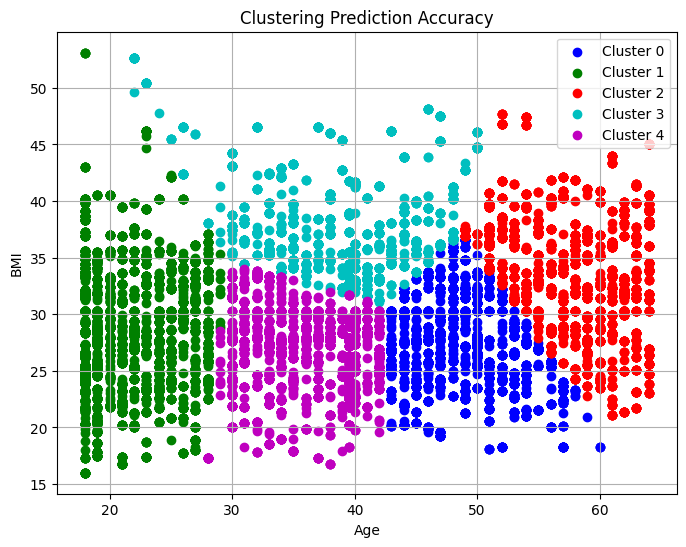

In [24]:
from sklearn.cluster import KMeans

def cluster_accuracy(X, num_clusters):
    """
    Predicts cluster labels for data points and plots the clusters.

    Args:
    - X (DataFrame): Input data containing features.
    - num_clusters (int): Number of clusters to fit the data.

    Returns:
    - None
    """
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    # Plot the clusters
    plt.figure(figsize=(8, 6))
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Colors for plotting
    for label in np.unique(cluster_labels):
        plt.scatter(X.iloc[cluster_labels == label, 0], X.iloc[cluster_labels == label, 1], 
                    color=colors[label], label=f'Cluster {label}')

    plt.title('Clustering Prediction Accuracy')
    plt.xlabel('Age')  # Assuming 'Age' is one of the features in your health insurance dataset
    plt.ylabel('BMI')  # Assuming 'BMI' is one of the features in your health insurance dataset
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming df is the Health Insurance Dataset DataFrame

# Select relevant features for clustering
X = df[['age', 'bmi']]  # Replace with appropriate column names from your health insurance dataset

# Define number of clusters
num_clusters = 5

# Call the function to predict cluster labels and plot clusters
cluster_accuracy(X, num_clusters)


## fitting prediction/ accuracy of fitting prediction 

This set of functions performs a line fitting to given data points and calculates uncertainties, then plots the original data points along with the fitted line and uncertainty predictions. Here's what each part of the code does:

fit_line(x, y): This function fits a line to the given data points (x, y) using linear regression (linregress) from the scipy.stats module. It calculates the slope, intercept, standard error of the slope, and standard error of the intercept. It returns these values.

plot_fitted_line_with_uncertainty(x, y, slope, intercept, slope_stderr, intercept_stderr, num_predictions=20): This function plots the original data points along with the fitted line and uncertainty predictions. It takes the independent variable x, dependent variable y, fitted line parameters (slope, intercept), standard errors of slope and intercept (slope_stderr, intercept_stderr), and the number of predictions to generate (num_predictions). It plots the original data points and the fitted line. Then, it generates random uncertainties based on standard errors, ensuring that the scale parameter is non-negative. For each prediction, it adds these uncertainties to the fitted line and plots them with gray lines. Finally, it sets labels, title, legend, and grid for the plot and shows it.

Extract relevant columns (age and bmi) from the Health Insurance Dataset DataFrame (df).

Fit a line to the data using the fit_line function.

Plot the fitted line with uncertainty predictions using the plot_fitted_line_with_uncertainty function.

These functions help in visually assessing the quality of the line fitting and understanding the uncertainty associated with the predictions.

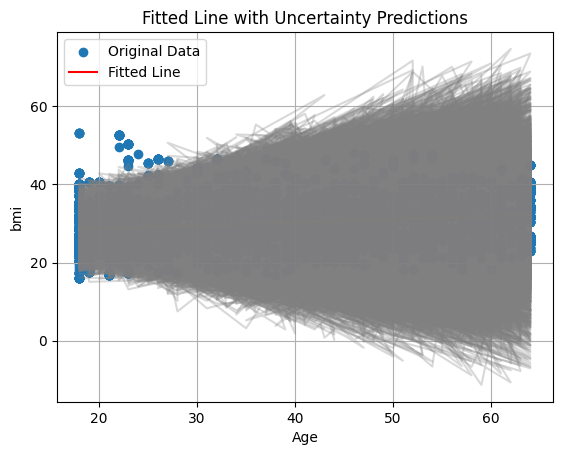

In [25]:
from scipy.stats import linregress
def fit_line(x, y):
    """
    Fits a line to the given data points and calculates uncertainties.

    Args:
    - x (array-like): Independent variable.
    - y (array-like): Dependent variable.

    Returns:
    - slope (float): Slope of the fitted line.
    - intercept (float): Intercept of the fitted line.
    - slope_stderr (float): Standard error of the slope.
    - intercept_stderr (float): Standard error of the intercept.
    """
    slope, intercept, slope_stderr, intercept_stderr, _ = linregress(x, y)
    return slope, intercept, slope_stderr, intercept_stderr

def plot_fitted_line_with_uncertainty(x, y, slope, intercept, slope_stderr, intercept_stderr, num_predictions=20):
    """
    Plots the original data points along with the fitted line and uncertainty predictions.

    Args:
    - x (array-like): Independent variable.
    - y (array-like): Dependent variable.
    - slope (float): Slope of the fitted line.
    - intercept (float): Intercept of the fitted line.
    - slope_stderr (float): Standard error of the slope.
    - intercept_stderr (float): Standard error of the intercept.
    - num_predictions (int): Number of predictions to generate.

    Returns:
    - None
    """
    plt.scatter(x, y, label='Original Data')
    plt.plot(x, slope * x + intercept, color='red', label='Fitted Line')
    
    for _ in range(num_predictions):
        # Generate random uncertainties based on standard errors, ensuring scale parameter is non-negative
        slope_uncertainty = max(0, slope_stderr) * np.random.randn(len(x))
        intercept_uncertainty = max(0, intercept_stderr) * np.random.randn(len(x))
        
        # Generate prediction with uncertainties
        prediction = slope * x + intercept + slope_uncertainty * x + intercept_uncertainty
        
        # Plot prediction with uncertainties
        plt.plot(x, prediction, color='gray', alpha=0.3)

    plt.xlabel('Age')
    plt.ylabel('bmi')
    plt.title('Fitted Line with Uncertainty Predictions')
    plt.legend()
    plt.grid(True)
    plt.show()


# Extract relevant columns for fitting
x = df['age'].values
y = df['bmi'].values

# Fit a line to the data
slope, intercept, slope_stderr, intercept_stderr = fit_line(x, y)

# Plot the fitted line with uncertainty predictions
plot_fitted_line_with_uncertainty(x, y, slope, intercept, slope_stderr, intercept_stderr)


## exponential and polynimial fitting 
This set of functions performs polynomial and exponential fitting for given data and visualizes the results. Here's what each part of the code does:

polynomial_fit(x, y, degree=2): This function performs polynomial fitting for the given data (x, y). It takes the independent variable x, dependent variable y, and the degree of the polynomial (degree, default is 2). It uses np.polyfit to obtain the coefficients of the polynomial fit and then creates a polynomial fit function using np.poly1d. It returns the polynomial fit function.

exponential_fit(x, y): This function performs exponential fitting for the given data (x, y). It defines an exponential function exponential_func, then uses curve_fit from scipy.optimize to obtain the optimal parameters (popt) for the exponential function. It returns these optimal parameters.

Example usage with the health insurance dataset:

Extract the independent variable (x, 'age') and dependent variable (y, 'bmi') from the dataset.
Perform polynomial fitting with a specified degree.
Perform exponential fitting.
Define the exponential function.
Plot the original data along with the polynomial and exponential fits.
This code helps in visualizing how well polynomial and exponential functions fit the given data, allowing for better understanding of the relationships between variables.

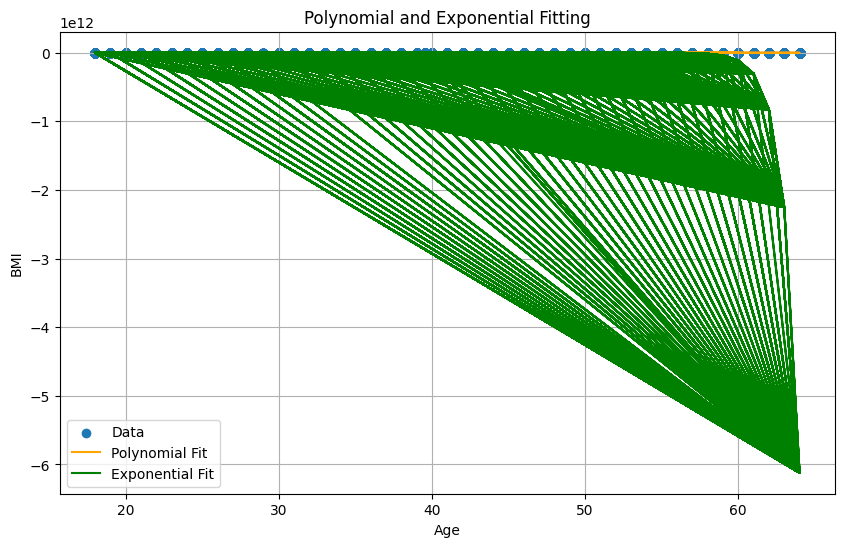

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def polynomial_fit(x, y, degree=2):
    """
    Perform polynomial fitting for the given data.

    Parameters:
        x (array-like): Independent variable.
        y (array-like): Dependent variable.
        degree (int): Degree of the polynomial (default is 2).

    Returns:
        numpy.poly1d: Polynomial fit function.
    """
    coefficients = np.polyfit(x, y, degree)
    poly_fit = np.poly1d(coefficients)
    return poly_fit

def exponential_fit(x, y):
    """
    Perform exponential fitting for the given data.

    Parameters:
        x (array-like): Independent variable.
        y (array-like): Dependent variable.

    Returns:
        tuple: Optimal parameters for the exponential function.
    """
    def exponential_func(x, a, b, c):
        return a * np.exp(b * x) + c

    popt, _ = curve_fit(exponential_func, x, y)
    return popt

# Example usage with health insurance dataset
# Assuming 'age' is the independent variable and 'bmi' is the dependent variable

x = df['age']
y = df['bmi']

# Perform polynomial fitting
degree = 2  # Degree of the polynomial
poly_fit = polynomial_fit(x, y, degree)

# Perform exponential fitting
popt = exponential_fit(x, y)

# Define exponential function
def exponential_func(x, a, b, c):
    return a * np.exp(b * x) + c

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data')
plt.plot(x, poly_fit(x), label='Polynomial Fit', color='orange')
plt.plot(x, exponential_func(x, *popt), label='Exponential Fit', color='green')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Polynomial and Exponential Fitting')
plt.legend()
plt.grid(True)
plt.show()
